Import packages 

In [1]:
#Importing packages
import time
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

Define the Hyperparameter & Data info

In [2]:
#Learning Rate, Iterations, Batch Size Hyperparameters
learning_rate = 0.001
iterations = 40000
batch_size = 256
#dropout = 0.5
#epochs = 10

Load CIFAR-10 Data

In [3]:
#CIFAR-10 Dataset has 60000 images of common objects, 6k images per class and 10 classes in total
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Data Preparation

In [4]:
#Convert to float type
X_train, X_test = np.array(X_train, np.float32), np.array(X_test, np.float32)

#Flatten images to 1-D vector of 3072 features (32*32*3)
X_train, X_test = X_train.reshape([-1, 3072]), X_test.reshape([-1, 3072])

#One hot encoding of labels
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

#Normalization of images
X_train = X_train / 255.
X_test = X_test / 255.

#Use Tensorflow data for shuffling and fetching it batchwise
train_data = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(50000, 3072)
(50000, 10)
(10000, 3072)
(10000, 10)


Define the model

In [5]:
class NeuralNet(Model):
    
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.L1 = layers.Dense(1024, activation=tf.nn.relu)
        self.L2 = layers.Dense(512, activation=tf.nn.relu)
        self.L3 = layers.Dense(256, activation=tf.nn.relu)
        self.L4 = layers.Dense(128, activation=tf.nn.relu)
        self.Yhat = layers.Dense(10)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.L1(x)
        x = self.L2(x)
        x = self.L3(x)
        x = self.L4(x)
        x = self.Yhat(x)
        if not is_training:
            x = tf.nn.softmax(x)
        return x

# Build the network
model = NeuralNet()

Define the cost function

In [6]:
#Cost function definition, using the softmax cross entropy loss
def cross_entropy(y_pred, y_true):
    
    loss = tf.nn.softmax_cross_entropy_with_logits(logits = y_pred, labels = y_true)
    
    return tf.reduce_mean(loss)

Metrics to check predictions

In [7]:
#To verify the predictions
def accuracy(y_pred, y_true):
    
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
    a = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)
    
    return a

Define the optimizer

In [8]:
#Setup the optimizer function with learning rate as parameter
optimizer = tf.optimizers.Adam(learning_rate)

Put it all together (Optimization of the network)

In [9]:
def run(X, Y):
    
    #Using GradientTape for automatic differentiation.
    with tf.GradientTape() as tape:
        pred = model(X, is_training = True)
        loss = cross_entropy(pred, Y)
        
    #Get W and B values 
    train_variables = model.trainable_variables
    
    #Compute gradients.
    gradients = tape.gradient(loss, train_variables)
    
    #Update W and b following gradients
    optimizer.apply_gradients(zip(gradients, train_variables))

Let's train for 40000 iterations

In [10]:
#Run the for-loop for a well defined number of epochs
s = time.clock()
loss_plot = []
accuracy_plot = []

for i, (Batch_x, Batch_y) in enumerate(train_data.take(40001), 1):
    #Run the optimization to update W and b values.
    run(Batch_x, Batch_y)
    
    if i % 2000 == 0:
        pred = model(Batch_x, is_training = True)
        loss = cross_entropy(pred, Batch_y)
        acc = accuracy(pred, Batch_y)
        print('Iteration = {}'.format(i))
        print('Loss = {}'.format(loss))
        print('Accuracy = {}\n'.format(acc))
        
        loss_plot.append(loss)
        accuracy_plot.append(acc)
        
e = time.clock()

print('Time Elapsed = {} \n'.format(e-s))

pred = model(X_test, is_training = False)
test_accuracy = accuracy(pred, Y_test)
print('Accuracy on Test Set is {}'.format(test_accuracy))

C:\Users\Pranav\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Iteration = 2000
Loss = 1.1579036712646484
Accuracy = 0.5390625

Iteration = 4000
Loss = 0.8776501417160034
Accuracy = 0.6875

Iteration = 6000
Loss = 0.591355562210083
Accuracy = 0.8046875

Iteration = 8000
Loss = 0.48672130703926086
Accuracy = 0.83203125

Iteration = 10000
Loss = 0.31234341859817505
Accuracy = 0.8984375

Iteration = 12000
Loss = 0.18548598885536194
Accuracy = 0.93359375

Iteration = 14000
Loss = 0.19418595731258392
Accuracy = 0.9296875

Iteration = 16000
Loss = 0.08150805532932281
Accuracy = 0.96484375

Iteration = 18000
Loss = 0.08615701645612717
Accuracy = 0.96875

Iteration = 20000
Loss = 0.07693085819482803
Accuracy = 0.97265625

Iteration = 22000
Loss = 0.08117414265871048
Accuracy = 0.984375

Iteration = 24000
Loss = 0.11098531633615494
Accuracy = 0.96484375

Iteration = 26000
Loss = 0.04526330903172493
Accuracy = 0.9921875

Iteration = 28000
Loss = 0.10141861438751221
Accuracy = 0.98046875

Iteration = 30000
Loss = 0.09146558493375778
Accuracy = 0.9765625

Ite

C:\Users\Pranav\anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


Accuracy on Test Set is 0.4959000051021576


Plotting the graph

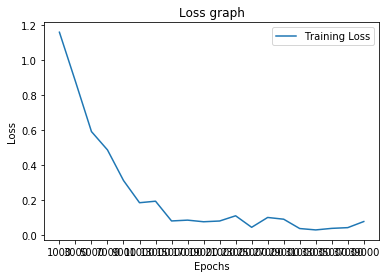

In [11]:
import matplotlib.pyplot as plt
import numpy as np

iterations = np.arange(1000, 40001, 2000)
plt.plot(iterations, loss_plot, label = 'Training Loss')
plt.title('Loss graph')
plt.xlabel('Epochs')
plt.xticks(np.arange(1000, 40001, 2000))
plt.ylabel('Loss')
plt.legend()
plt.show()

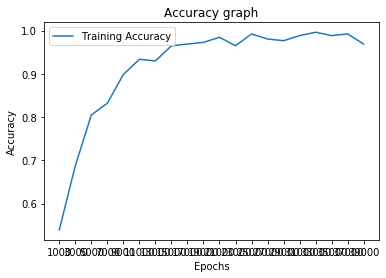

In [12]:
iterations = np.arange(1000, 40001, 2000)
plt.plot(iterations, accuracy_plot, label = 'Training Accuracy')
plt.title('Accuracy graph')
plt.xlabel('Epochs')
plt.xticks(np.arange(1000, 40001, 2000))
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Real Time Predictions

In [13]:
def real_time(index):
    '''
    
    '''
    
    labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    
    prediction = model(X_test[index].reshape(1, 3072), is_training = False)
    print('Actual Ground Truth is {} ; {}'.format(np.squeeze(Y_test[index]), labels[np.argmax(Y_test[index])]))
    print('Prediction for test image is {}; {}'.format(np.squeeze(prediction), labels[np.argmax(prediction[0])]))
    plt.imshow(np.reshape(X_test[index].reshape(1, 3072), [32, 32, 3]))

Actual Ground Truth is [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] ; Horse
Prediction for test image is [4.80074505e-07 3.66243068e-04 3.19800705e-07 2.54331667e-10
 5.92246124e-07 1.01439625e-01 4.39066499e-01 1.38287700e-03
 4.57741886e-01 1.41323812e-06]; Ship


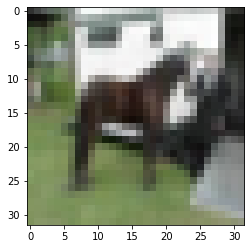

In [14]:
real_time(20)

Actual Ground Truth is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] ; Deer
Prediction for test image is [1.47324535e-08 6.06261710e-06 4.49594024e-16 4.80628842e-22
 9.99993920e-01 1.50198212e-15 6.06323540e-23 1.26734289e-12
 2.37351263e-13 2.02674166e-09]; Deer


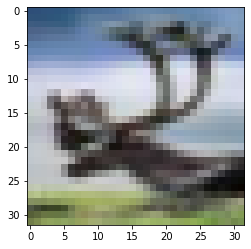

In [15]:
real_time(40)